In [1]:
# Predictive modelling: to determine factors leading to a Fraudulent insurance claim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/fraud_oracle.csv')

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
# to check for missing variables
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
# to check for duplicates
duplicates = df[df.duplicated()]

In [8]:
duplicates

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [9]:
# dataset contains 15,420 insurance claims
len(df)

15420

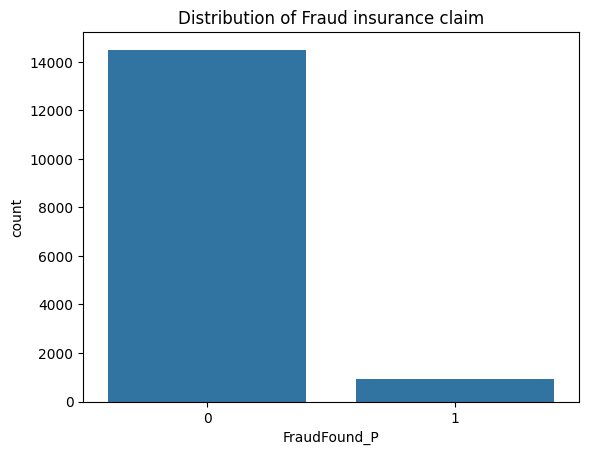

In [10]:
# to plot distribution of target variable, 'FraudFound_P'
sns.countplot(data=df, x='FraudFound_P')
plt.title('Distribution of Fraud insurance claim')
plt.show()

In [11]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [12]:
# only 5.98% are Fraudulen cases
100 * df['FraudFound_P'].value_counts()/len(df)

FraudFound_P
0    94.014267
1     5.985733
Name: count, dtype: float64

In [13]:
# to print categorical variables
df.select_dtypes('object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [14]:
df.select_dtypes('object').columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [15]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [16]:
month_order = ['Jan',
               'Feb',
               'Mar',
               'Apr',
               'May',
               'Jun',
               'Jul',
              'Aug',
              'Sep',
              'Oct',
              'Nov',
              'Dec']

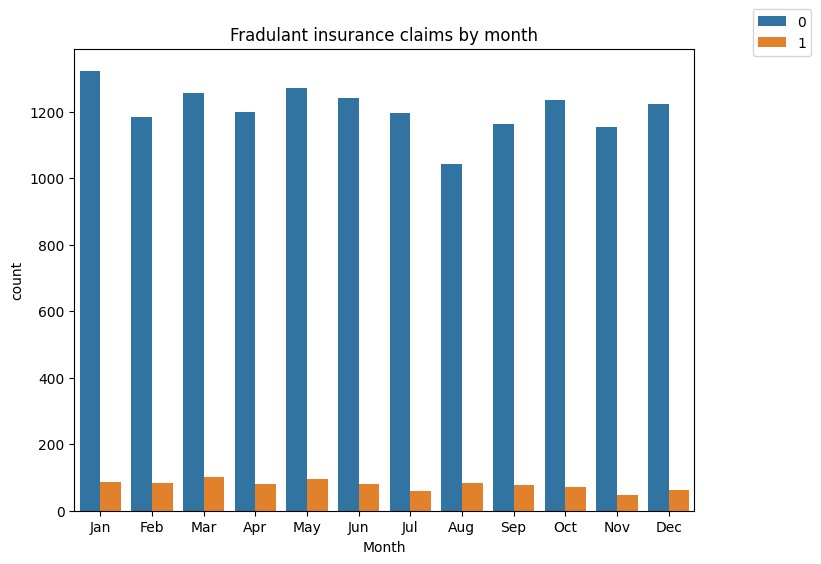

In [17]:
# March has the highest fraudulent claims, followed by May
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Month', order = month_order ,hue = 'FraudFound_P')
plt.title('Fradulant insurance claims by month')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [18]:
pd.DataFrame(df.groupby(['Month','FraudFound_P'])['FraudFound_P'].count())

FraudFound_P
Month FraudFound_P              
Apr   0                     1200
      1                       80
Aug   0                     1043
      1                       84
Dec   0                     1223
      1                       62
Feb   0                     1184
      1                       82
Jan   0                     1324
      1                       87
Jul   0                     1197
      1                       60
Jun   0                     1241
      1                       80
Mar   0                     1258
      1                      102
May   0                     1273
      1                       94
Nov   0                     1155
      1                       46
Oct   0                     1235
      1                       70
Sep   0                     1164
      1                       76

In [19]:
dayOfWeek_order = ['Monday',
                   'Tuesday',
                   'Wednesday',
                   'Thursday',
                   'Friday',
                   'Saturday',
                  'Sunday']

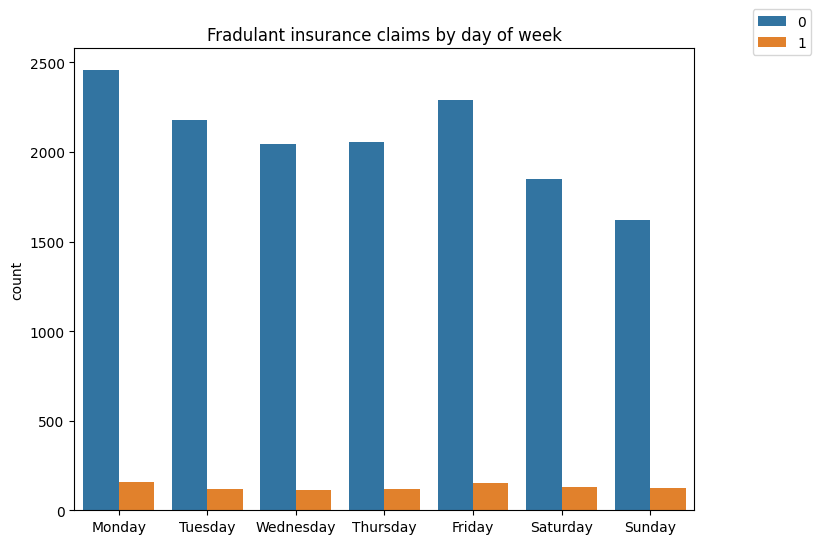

In [20]:
# Monday seems to have the highest fraudulant claims, followed by Friday
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='DayOfWeek', order=dayOfWeek_order, hue = 'FraudFound_P')
plt.title('Fradulant insurance claims by day of week')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("")
plt.show()

In [21]:
# there is an outlier value '0'
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [22]:
# to remove the outlier value
df = df[df['MonthClaimed'] !='0']

In [23]:
# to double- check again
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
Name: count, dtype: int64

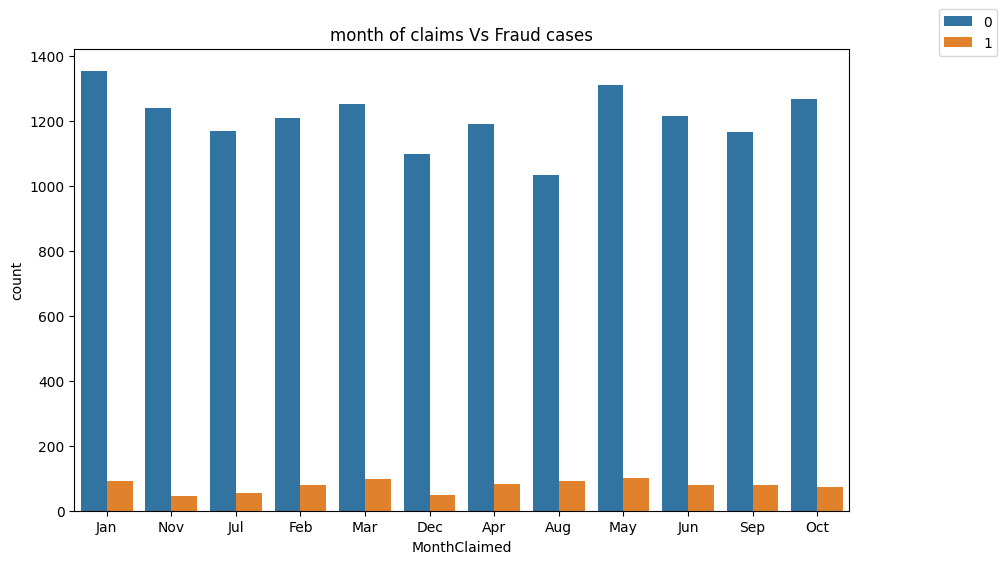

In [24]:
# Jan seems to have the highest fraudulant insurance claims
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='MonthClaimed', hue = 'FraudFound_P')
plt.title('month of claims Vs Fraud cases')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

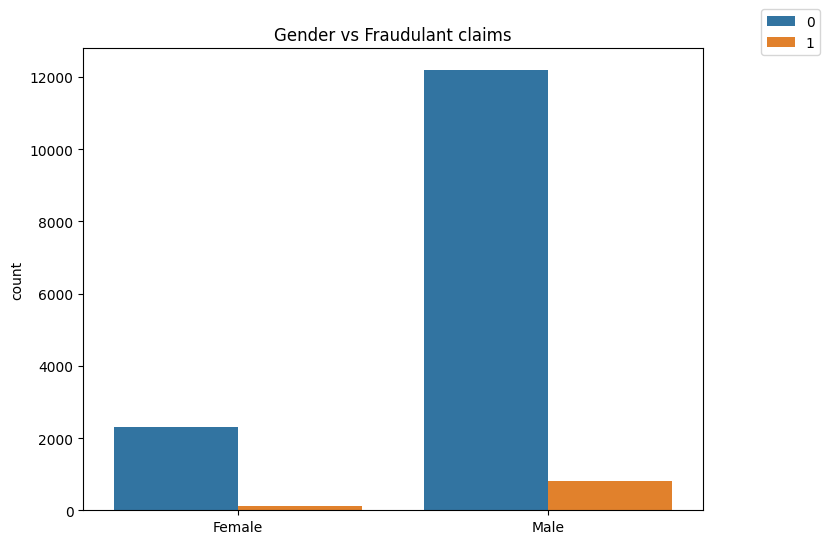

In [25]:
# Male drivers seems to make the most Fraudulant vehical insurance claim
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Sex',hue = 'FraudFound_P')
plt.title('Gender vs Fraudulant claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("")
plt.show()

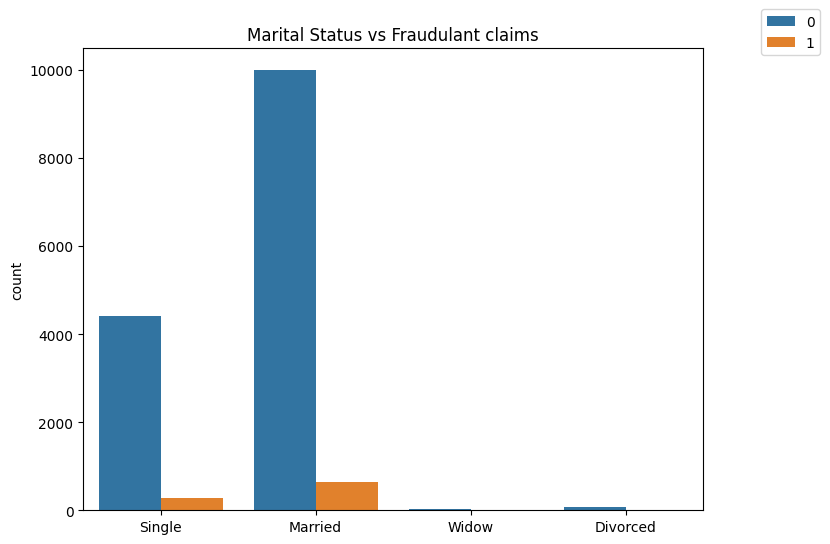

In [26]:
# customers who are married seems to make the most Fraudulant insurance claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='MaritalStatus',hue = 'FraudFound_P')
plt.title('Marital Status vs Fraudulant claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("")
plt.show()

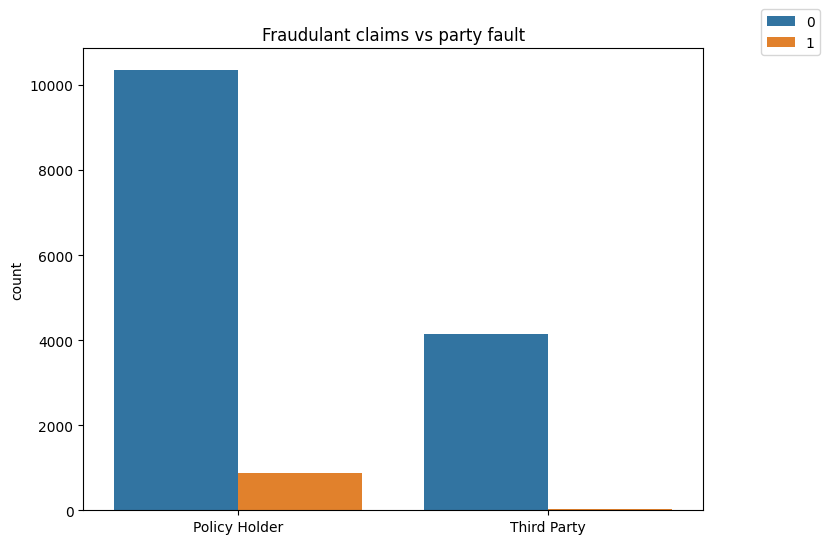

In [27]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Fault',hue = 'FraudFound_P')
plt.title('Fraudulant claims vs party fault')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("")
plt.show()

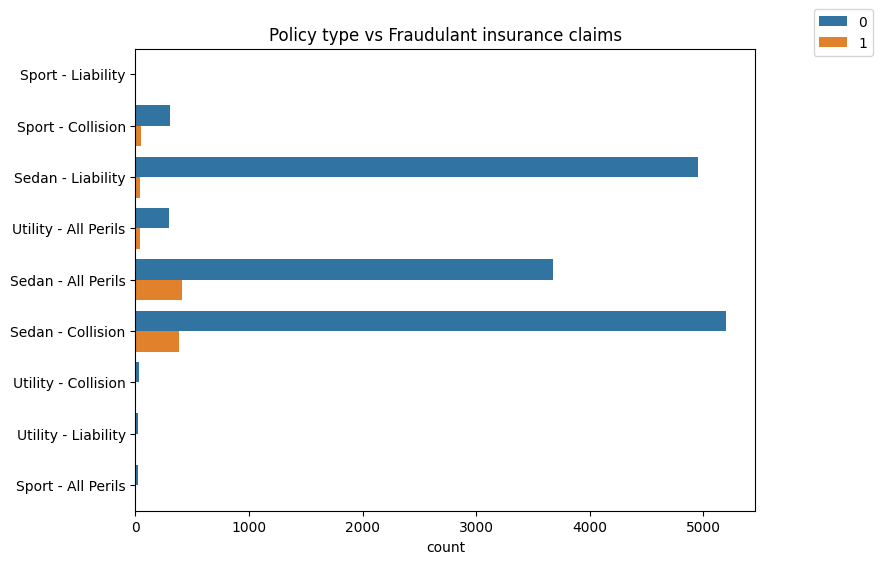

In [28]:
# it seems like 'Sedan' policy type has the most fradulant claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, y='PolicyType',hue = 'FraudFound_P')
plt.title('Policy type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("")
plt.show()

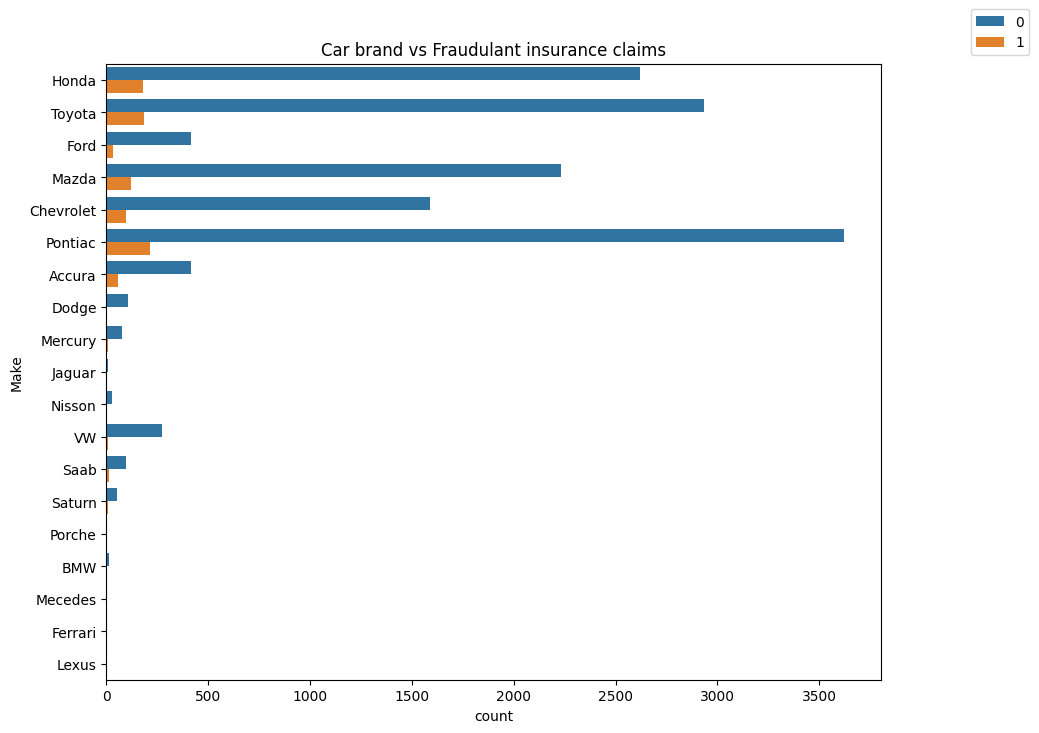

In [29]:
# 'Pontiac' seems to have the highest fraudulant insurance claims
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y='Make',hue = 'FraudFound_P')
plt.title('Car brand vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

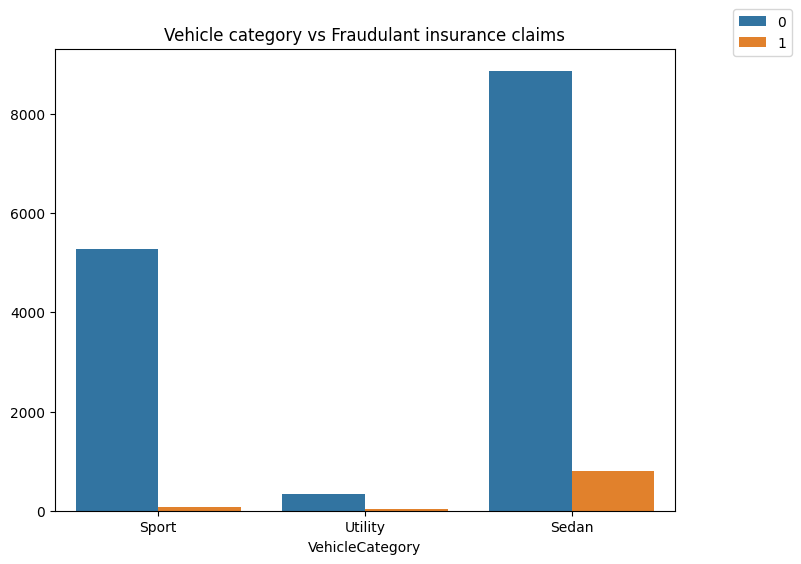

In [30]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='VehicleCategory',hue = 'FraudFound_P')
plt.title('Vehicle category vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("")
plt.show()

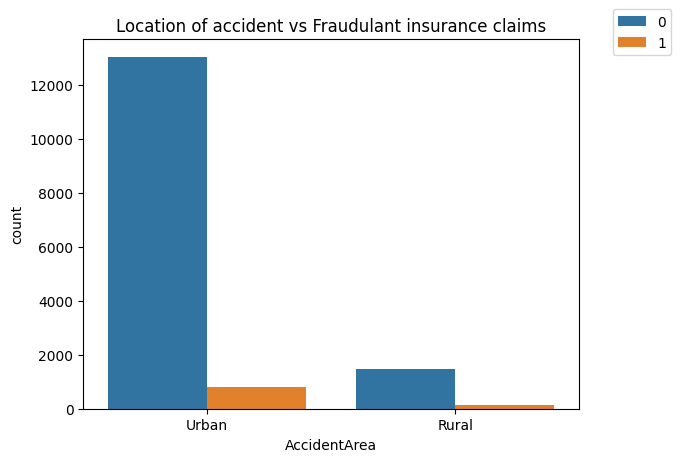

In [31]:
# the 'Urban' area sees the highest number of Fraudulant insurance claims
sns.countplot(data=df, x='AccidentArea',hue = 'FraudFound_P')
plt.title('Location of accident vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

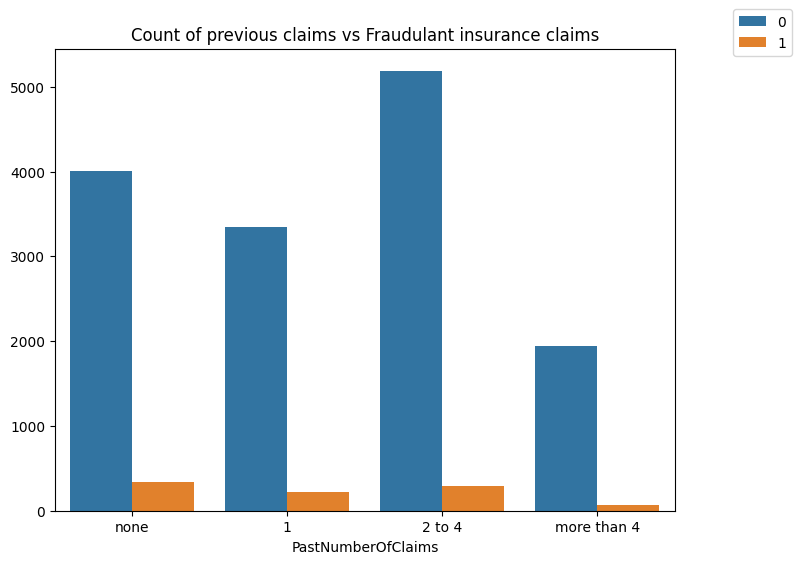

In [32]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='PastNumberOfClaims',hue = 'FraudFound_P')
plt.title('Count of previous claims vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("")
plt.show()

In [33]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [34]:
ageOfVehicle_order = ['new',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                     'more than 7']

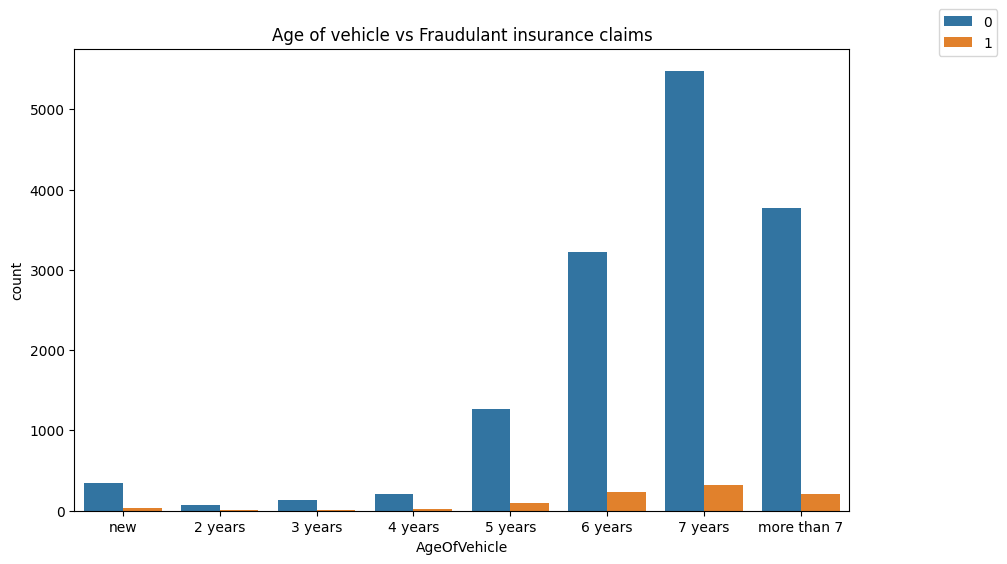

In [35]:
# it seems that the older the vehicle, the more likely the insurance claim is fradulant 
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='AgeOfVehicle', order= ageOfVehicle_order ,hue = 'FraudFound_P')
plt.title('Age of vehicle vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [36]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [37]:
age_policy_holder_order = ['16 to 17',
                           '18 to 20',
                           '21 to 25',
                           '26 to 30',
                           '31 to 35',
                           '36 to 40',
                           '41 to 50',
                           '51 to 65',
                           'over 65']

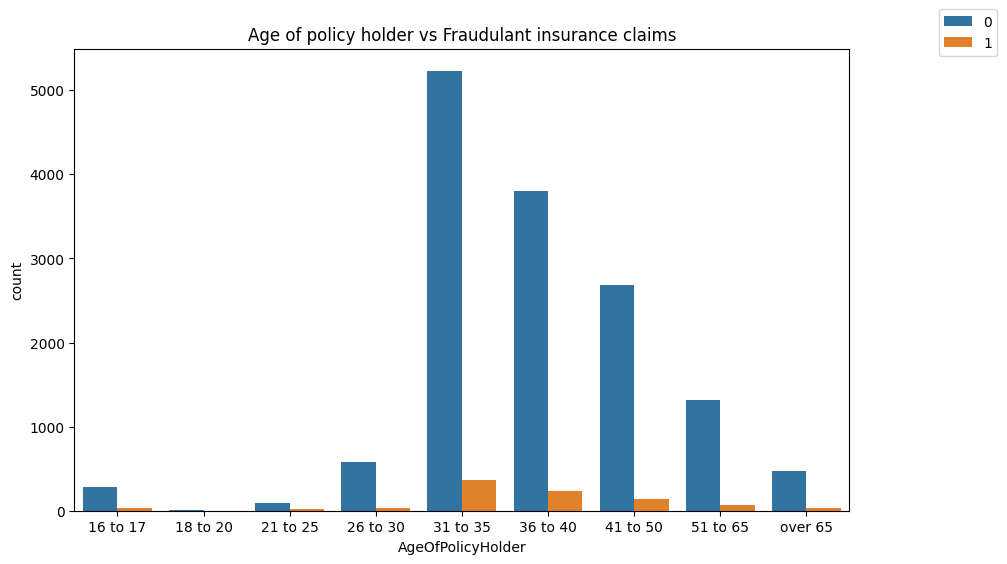

In [358]:
# Customers between 31 to 35 years makes the most fraudulant claims
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='AgeOfPolicyHolder', order = age_policy_holder_order, hue = 'FraudFound_P')
plt.title('Age of policy holder vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

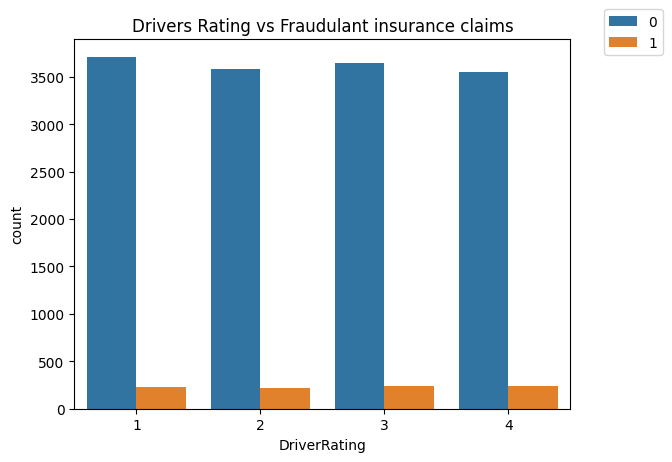

In [364]:
# Customers between 31 to 35 years makes the most fraudulant claims
# plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='DriverRating', hue = 'FraudFound_P')
plt.title('Drivers Rating vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [368]:
# Driver's rating = 3, more prone to Fraudent vehical insurance claims
pd.DataFrame(df.groupby(['DriverRating','FraudFound_P'])['FraudFound_P'].count())

FraudFound_P
DriverRating FraudFound_P              
1            0                     3712
             1                      232
2            0                     3586
             1                      214
3            0                     3642
             1                      242
4            0                     3556
             1                      235

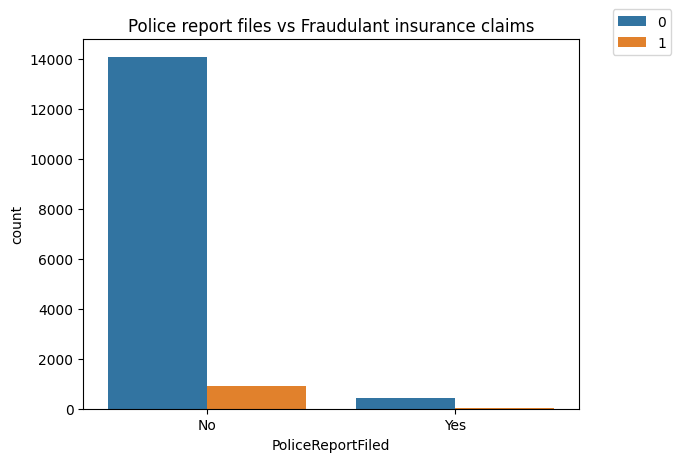

In [39]:
# for the majority of the fraudulant insurance claims, no policy report was made
sns.countplot(data=df, x='PoliceReportFiled', hue = 'FraudFound_P')
plt.title('Police report files vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

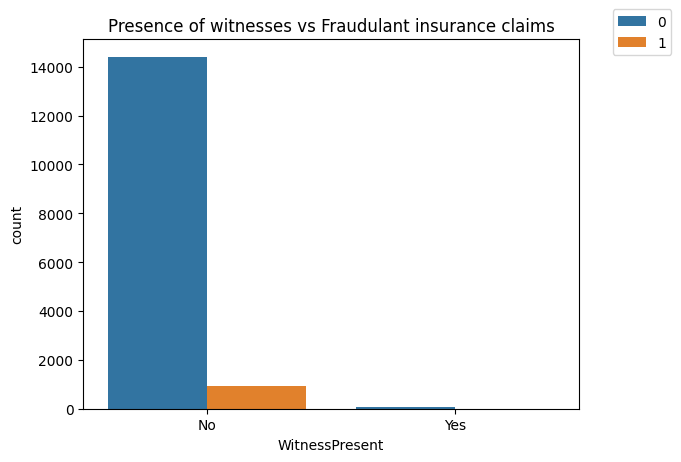

In [40]:
# majority has no presence of witnesses for Fraudulant claims
sns.countplot(data=df, x='WitnessPresent', hue = 'FraudFound_P')
plt.title('Presence of witnesses vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

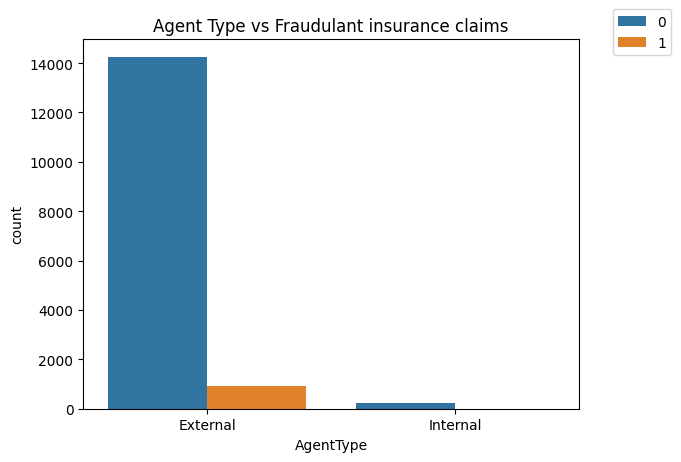

In [41]:
sns.countplot(data=df, x='AgentType', hue = 'FraudFound_P')
plt.title('Agent Type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [42]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [43]:
num_cars_order = ['1 vehicle',
                  '2 vehicles',
                  '3 to 4',
                  '5 to 8',
                  'more than 8']

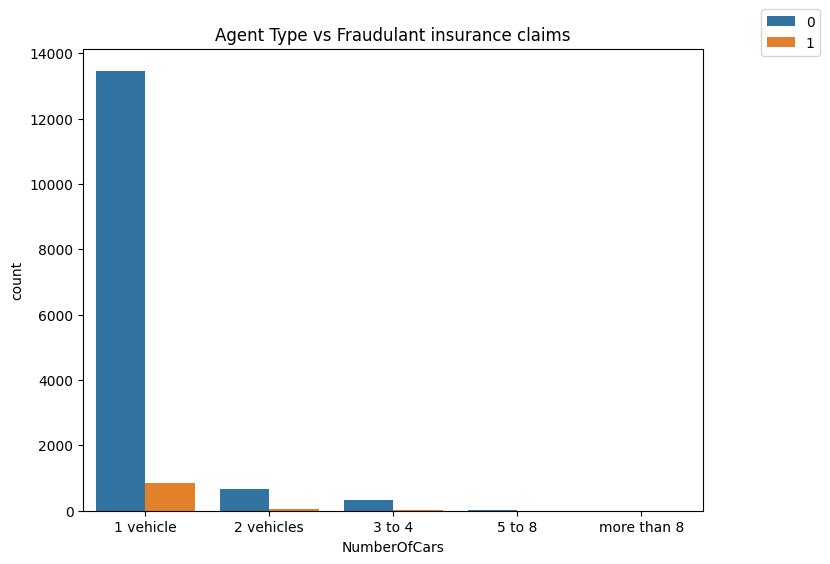

In [44]:
# customers with 1 car filed the most Fradulant insurance claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='NumberOfCars', order=num_cars_order, hue = 'FraudFound_P')
plt.title('Agent Type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

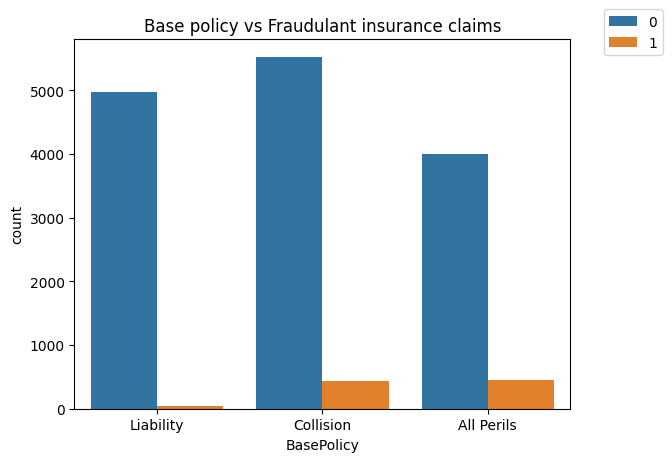

In [45]:
# Collision has the highest number of Fraudulant insurance claims
sns.countplot(data=df, x='BasePolicy', hue = 'FraudFound_P')
plt.title('Base policy vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [46]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [47]:
vehicle_price_order = ['less than 20000',
                       '20000 to 29000',
                       '30000 to 39000',
                       '40000 to 59000',
                       '60000 to 69000',
                       'more than 69000']

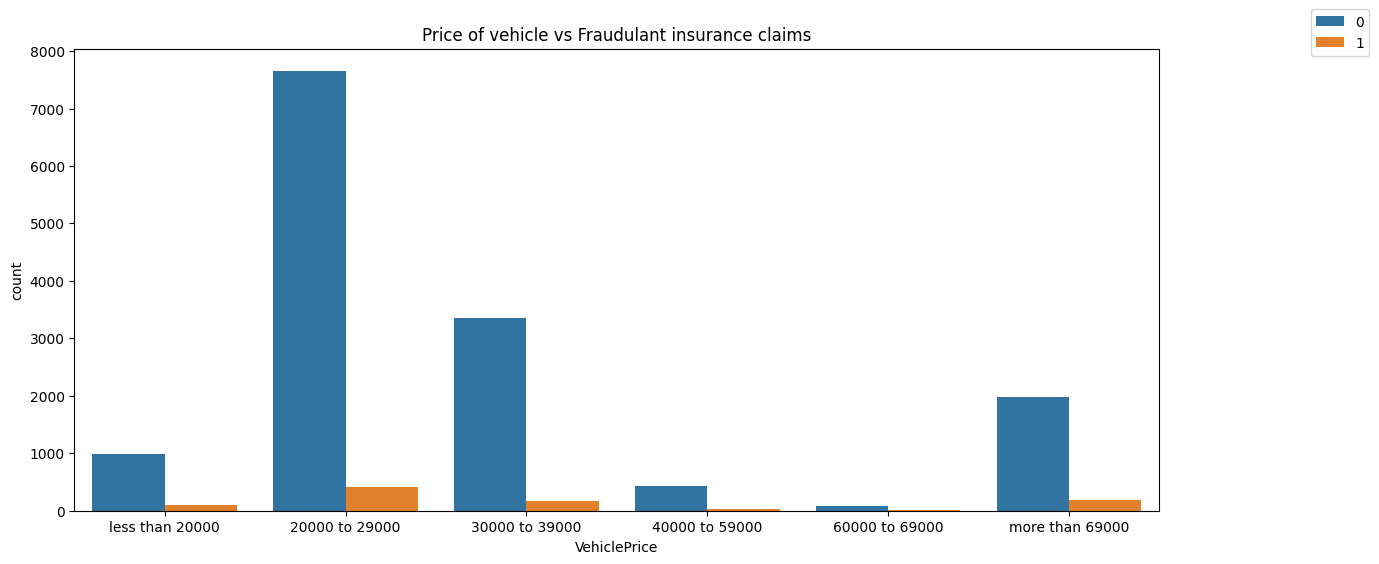

In [48]:
# most of the fraudulant insurance claims seems to be between $20,000 to $29,000
plt.figure(figsize=(14,6), dpi=100)
sns.countplot(data=df, x='VehiclePrice', order=vehicle_price_order ,hue = 'FraudFound_P')
plt.title('Price of vehicle vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [49]:
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [50]:
dayspolicyaccident_order = ['none',
                            '1 to 7',
                            '8 to 15',
                            '15 to 30',
                            'more than 30']

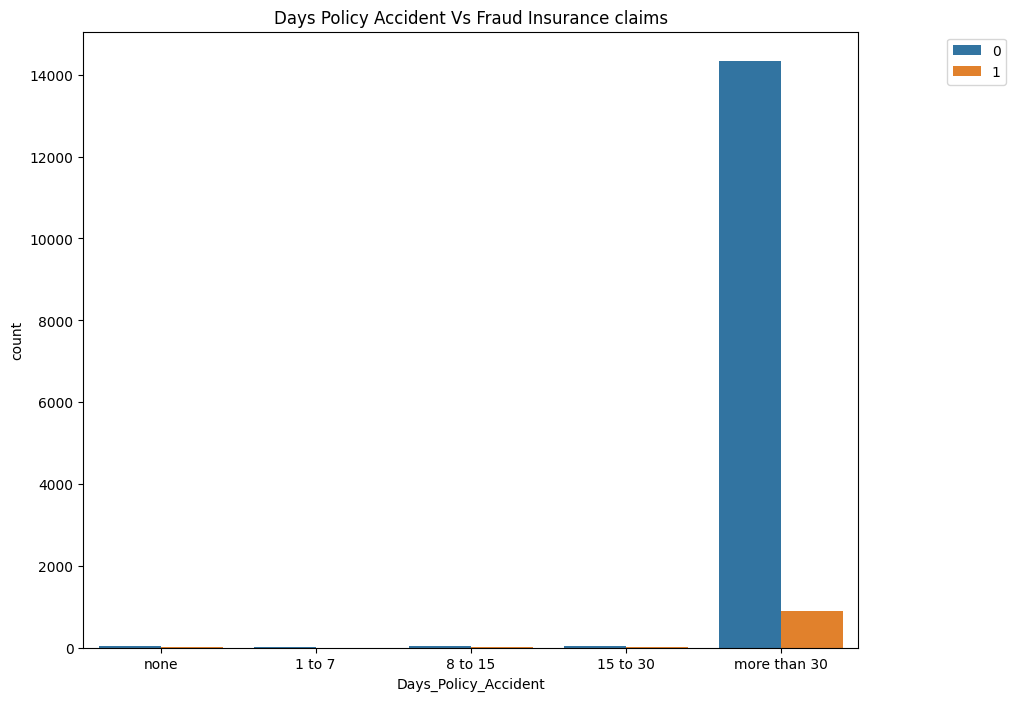

In [51]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Accident', order = dayspolicyaccident_order, hue='FraudFound_P')
plt.title('Days Policy Accident Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [52]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

In [53]:
dayspolicyclaim_order = ['8 to 15',
                         '15 to 30',
                         'more than 30']

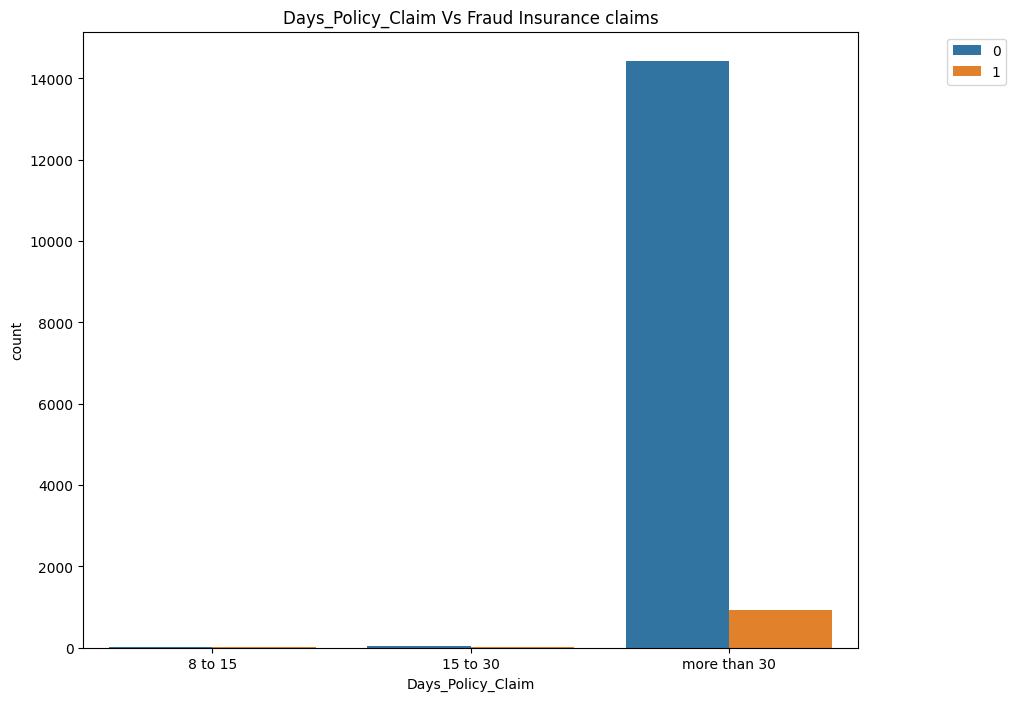

In [54]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Claim', order= dayspolicyclaim_order, hue='FraudFound_P')
plt.title('Days_Policy_Claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [55]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [56]:
addresschangeclaim_order = ['no change',
                            'under 6 months',
                            '1 year',
                            '2 to 3 years',
                            '4 to 8 years']

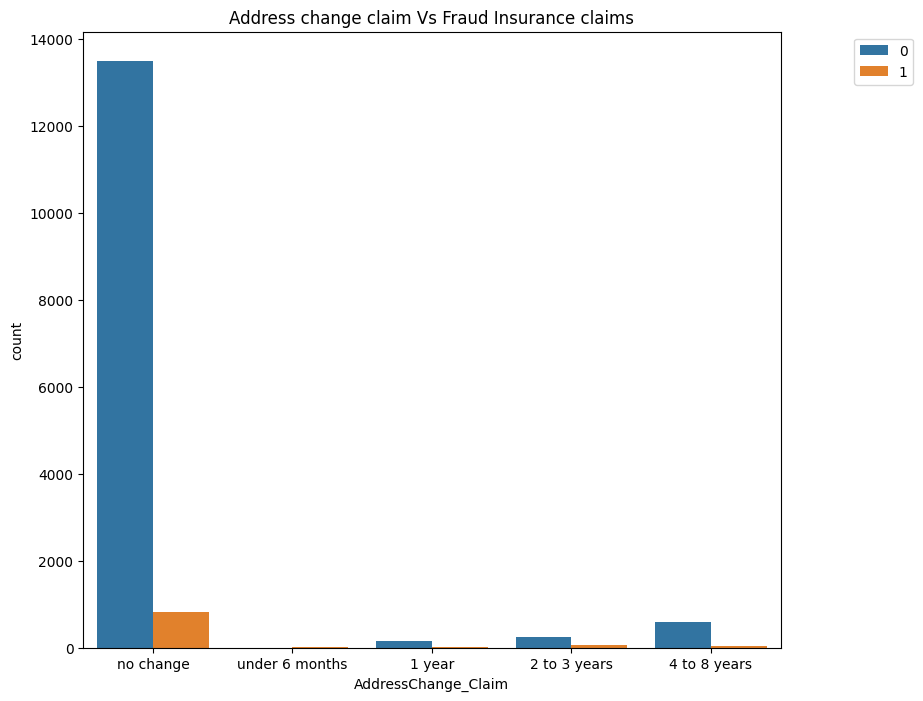

In [57]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='AddressChange_Claim', order=addresschangeclaim_order, hue='FraudFound_P')
plt.title('Address change claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [58]:
# to see the number of Vehical insurances claim by year
# 1994 has the highest vehicle insurance claim
pd.DataFrame(df['Year'].value_counts())

,count
Year,
1994,6141
1995,5195
1996,4083


In [59]:
# to select out numeric variables in the dataframe
df.select_dtypes(['int','float'])

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


In [60]:
# to see correlation of numeric variables against target variable:'FraudFound_P'
# 'Deductible' has the highest correlation against 'FraudFound_P'
df.select_dtypes(['int','float']).corr()['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
Deductible            0.017345
DriverRating          0.007259
WeekOfMonthClaimed   -0.005783
RepNumber            -0.007529
WeekOfMonth          -0.011872
PolicyNumber         -0.020369
Year                 -0.024778
Age                  -0.029798
Name: FraudFound_P, dtype: float64

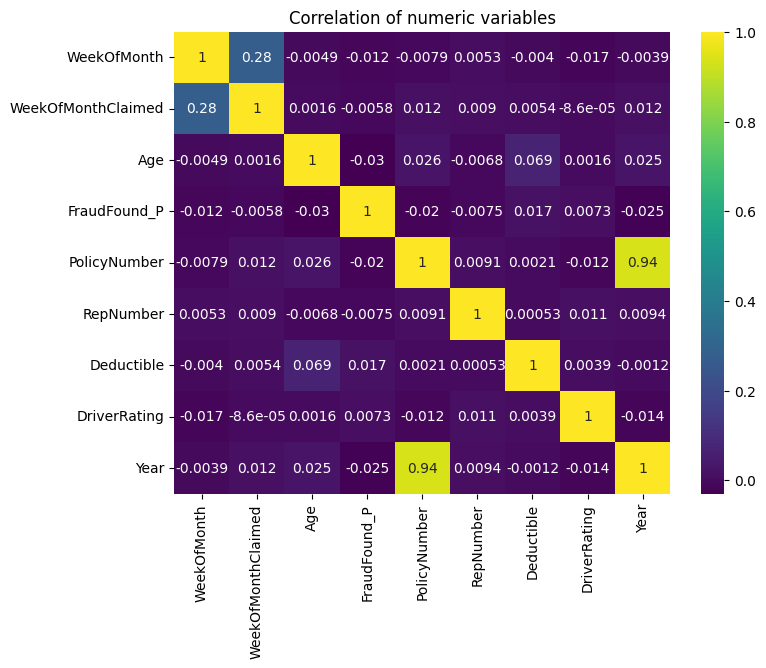

In [61]:
# to visualise in a correlation plot
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(data=df.select_dtypes(['int','float']).corr(), annot=True, cmap='viridis')
plt.title('Correlation of numeric variables')
plt.show()

In [62]:
# to remove unimportant variable before machine learning algorithm
df = df.drop(['Month','WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber'], axis=1)

In [63]:
# to define X and y
X = df.drop('FraudFound_P', axis=1)

In [64]:
# to convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [65]:
y = df['FraudFound_P']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
# testing data= 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
# to scale the dataset first as they are of unequal dimension
scaler = StandardScaler()

In [70]:
scaled_X_train = scaler.fit_transform(X_train)

In [71]:
scaled_X_test = scaler.transform(X_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [73]:
from xgboost import XGBClassifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
from sklearn.svm import SVC

In [77]:
# to import KNN machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [81]:
# to predict on the X testing set
rf_pred = rf.predict(scaled_X_test)

In [82]:
# to print out prediction for the random forest model
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
rf_train_pred = rf.predict(scaled_X_train)

In [84]:
# to print predictions of the Random Forest training set
rf_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [86]:
# to compute confusion matrix for RF training set
rf_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
rf_train_cm

array([[1., 0.],
       [0., 1.]])

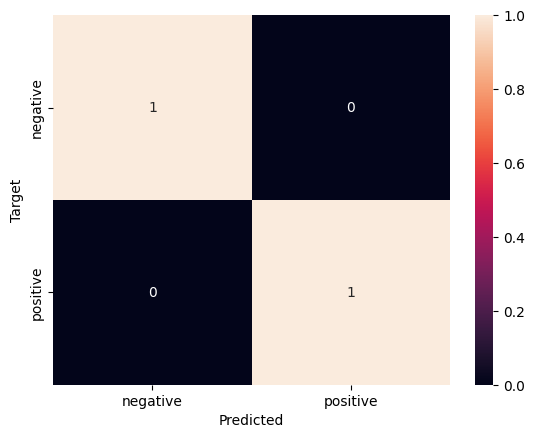

In [87]:
# to plot confusion matrix for Random Forest training set
def plot_cm(rf_train_cm):
    classes = ['negative','positive']
    df_rf_train_cm = pd.DataFrame(rf_train_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_rf_train_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(rf_train_cm)
plt.show()

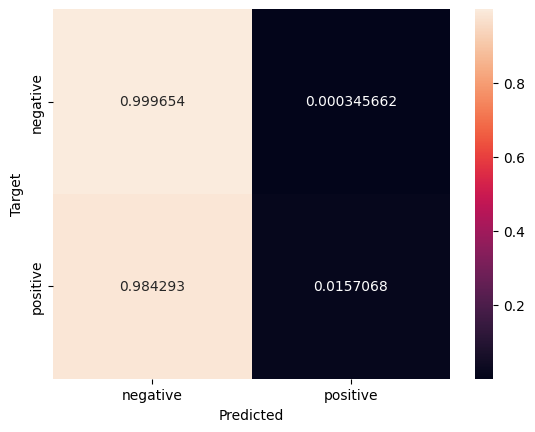

In [88]:
# to plot the confusion matrix for Random Forest Testing set
# accuracy rate for True Negative cases  = 99.56%
# accuracy rate for True positive cases (Fraud claims) = 0.0157
rf_test_cm = confusion_matrix(y_test, rf_pred, normalize='true')
plot_cm(rf_test_cm)
plt.show()

In [89]:
print("RF train AUC:", roc_auc_score(y_train, rf_train_pred))
print("RF test AUC:", roc_auc_score(y_test, rf_pred))

RF train AUC: 1.0
RF test AUC: 0.5076805721700512


In [90]:
# AUC score for Random Forest test model = 0.508

In [91]:
print(classification_report(y_test,rf_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2893
           1       0.75      0.02      0.03       191

    accuracy                           0.94      3084
   macro avg       0.84      0.51      0.50      3084
weighted avg       0.93      0.94      0.91      3084



In [92]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [93]:
ada.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [94]:
# to do prediction on the Adaboost train set
ada_train_pred = ada.predict(scaled_X_train)

In [95]:
# to print first 10 prediction of Adaboost training set
ada_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [96]:
# to predict on the X testing data
ada_pred = ada.predict(scaled_X_test)

In [97]:
ada_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
# Confusion matrix for AdaBoost train set
ada_train_cm = confusion_matrix(y_train, rf_train_pred, normalize='true')
ada_train_cm

array([[1., 0.],
       [0., 1.]])

In [99]:
# confusion matrix for AdaBoost model
# accuracy rate for Negative cases = 99.27%
# accuracy rate for Positive cases (Fraud claims) = 0.0366
ada_test_cm = confusion_matrix(y_test, ada_pred, normalize='true')
ada_test_cm

array([[0.9927411 , 0.0072589 ],
       [0.96335079, 0.03664921]])

In [100]:
# to compute the AUC score and F1 for AdaBoost model
print("Ada train AUC:", roc_auc_score(y_train, ada_train_pred))
print("Ada test AUC:", roc_auc_score(y_test, ada_pred))

Ada train AUC: 0.5046695691570251
Ada test AUC: 0.5146951569323317


In [101]:
# AUC score fo AdaBoost Classifier test model = 0.515

In [102]:
print(classification_report(y_test,ada_pred)) # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2893
           1       0.25      0.04      0.06       191

    accuracy                           0.93      3084
   macro avg       0.59      0.51      0.51      3084
weighted avg       0.90      0.93      0.91      3084



In [103]:
gb = GradientBoostingClassifier()

In [104]:
gb.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [105]:
gb_pred = gb.predict(scaled_X_test)

In [106]:
gb_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
# to predict on the Gradient Boost training set
gb_train_pred = gb.predict(scaled_X_train)

In [108]:
gb_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
# to compute the AUC and F1 score for Gradient Boost model
print("GB train AUC:", roc_auc_score(y_train, gb_train_pred))
print("GB test AUC:", roc_auc_score(y_test, gb_pred))

GB train AUC: 0.5340237285533372
GB test AUC: 0.5230417165101535


In [110]:
# AUC score for Gradient Boost classifier test model = 0.523

In [111]:
print(classification_report(y_test,gb_pred)) # Gradient Boost classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2893
           1       0.75      0.05      0.09       191

    accuracy                           0.94      3084
   macro avg       0.85      0.52      0.53      3084
weighted avg       0.93      0.94      0.91      3084



In [112]:
xg = XGBClassifier()

In [113]:
xg.fit(scaled_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [114]:
# to predict on X test data, XGBoost classifier
xg_pred = xg.predict(scaled_X_test)

In [115]:
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
# to return predictions on the XGBoost train set
xg_train_pred = xg.predict(scaled_X_train)

In [117]:
xg_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
# to print XGBoost confusion matrix on train set
xg_train_cm = confusion_matrix(y_train, xg_train_pred, normalize='true')
xg_train_cm

array([[9.99569077e-01, 4.30923037e-04],
       [5.30054645e-01, 4.69945355e-01]])

In [119]:
# to print XGBoost confusion matrix on testing set
# accuracy rate True negative cases = 98.99%
# accuracy rate True positive cases (Fraud claims) = 0.089
xg_test_cm = confusion_matrix(y_test, xg_pred, normalize='true')
xg_test_cm

array([[0.9899758 , 0.0100242 ],
       [0.91099476, 0.08900524]])

In [120]:
# to compute the AUC and F1 score for XGBoost classifier model
print("XGB train AUC:", roc_auc_score(y_train, xg_train_pred))
print("XGB test AUC:", roc_auc_score(y_test, xg_pred))

XGB train AUC: 0.7347572160770557
XGB test AUC: 0.5394905196330555


In [121]:
# AUC score for XGBoost Classifier test model = 0.539

In [122]:
print(classification_report(y_test,xg_pred)) # XGBoost classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2893
           1       0.37      0.09      0.14       191

    accuracy                           0.93      3084
   macro avg       0.66      0.54      0.55      3084
weighted avg       0.91      0.93      0.91      3084



In [123]:
dt = DecisionTreeClassifier()

In [124]:
dt.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [125]:
dt_pred = dt.predict(scaled_X_test)

In [126]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
# to do prediction on X train set: Decision Tree
dt_train_pred = dt.predict(scaled_X_train)

In [128]:
dt_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
# to compute the confusion matrix on Decision tree train set
dt_train_cm = confusion_matrix(y_train, dt_train_pred, normalize='true')
dt_train_cm

array([[1., 0.],
       [0., 1.]])

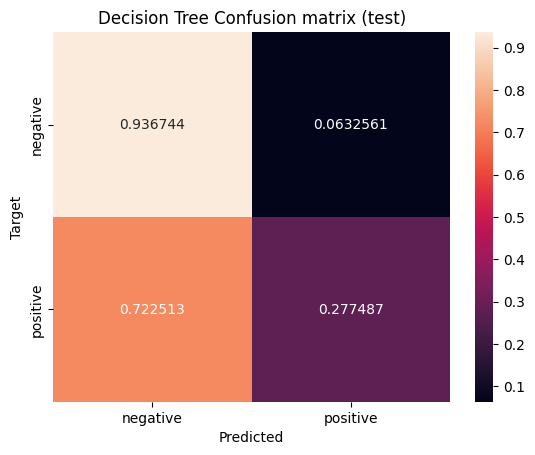

In [130]:
# to plot the confusion tree matrix for Decision Tree testing set
# accuracy rate Negative cases = 93.3%
# accuracy rate Positive cases (Fraud Claims) = 0.277
dt_test_cm = confusion_matrix(y_test, dt_pred, normalize='true')
plot_cm(dt_test_cm)
plt.title('Decision Tree Confusion matrix (test)')
plt.show()

In [131]:
# to print the AUC score and F1 score for Decision Tree prediction model
print("DT train AUC:", roc_auc_score(y_train, dt_train_pred))
print("DT test AUC:", roc_auc_score(y_test, dt_pred))

DT train AUC: 1.0
DT test AUC: 0.6071153877476414


In [132]:
# AUC score for Decision Tree classifier test model = 0.605

In [133]:
print(classification_report(y_test,dt_pred)) # Decision Tree classifier

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2893
           1       0.22      0.28      0.25       191

    accuracy                           0.90      3084
   macro avg       0.59      0.61      0.60      3084
weighted avg       0.91      0.90      0.90      3084



In [134]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [135]:
lr.fit(scaled_X_train, y_train)

LogisticRegression()

In [136]:
lr_pred = lr.predict(scaled_X_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
lr_train_pred = lr.predict(scaled_X_train)
lr_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
# to compute the confusion matrix on Logistic Regression train set
lr_train_cm = confusion_matrix(y_train, lr_train_pred, normalize='true')
lr_train_cm

array([[9.99051969e-01, 9.48030682e-04],
       [9.79508197e-01, 2.04918033e-02]])

In [139]:
# to compute the confusion matrix on Logistic Regression train set
lr_test_cm = confusion_matrix(y_test, lr_pred, normalize='true')
lr_test_cm

array([[9.99308676e-01, 6.91323885e-04],
       [9.79057592e-01, 2.09424084e-02]])

In [140]:
print("Logistic regression train AUC:", roc_auc_score(y_train, lr_train_pred))
print("Logistic regression test AUC:", roc_auc_score(y_test, lr_pred))

Logistic regression train AUC: 0.5097718862984841
Logistic regression test AUC: 0.5101255422458616


In [141]:
# AUC score for Logistic Regression test model = 0.510

In [142]:
print(classification_report(y_test, lr_pred)) # Logistic Regression classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2893
           1       0.67      0.02      0.04       191

    accuracy                           0.94      3084
   macro avg       0.80      0.51      0.50      3084
weighted avg       0.92      0.94      0.91      3084



In [143]:
# Initialize the Support Vector Classifier
svc = SVC()

In [144]:
svc.fit(scaled_X_train, y_train) 

SVC()

In [145]:
svc_pred = svc.predict(scaled_X_test)
svc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
svc_train_pred = svc.predict(scaled_X_train)
svc_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
# to compute confusion matrix for RF training set
svc_train_cm = confusion_matrix(y_train, svc_train_pred, normalize='true')
svc_train_cm

array([[1.        , 0.        ],
       [0.97677596, 0.02322404]])

In [148]:
# to plot the confusion matrix for Random Forest Testing set
# accuracy rate for True Negative cases (Diabetes) = 100%
# accuracy rate for True positive cases = 0, prediction model is overfitted
svc_test_cm = confusion_matrix(y_test, svc_pred, normalize='true')
svc_test_cm

array([[1., 0.],
       [1., 0.]])

In [149]:
print("Support vector machine train AUC:", roc_auc_score(y_train, svc_train_pred))
print("Support vector machine test AUC:", roc_auc_score(y_test, svc_pred))

Support vector machine train AUC: 0.5116120218579235
Support vector machine test AUC: 0.5


In [150]:
# AUC score for Support Vector Machine test model = 0.5

In [151]:
print(classification_report(y_test, svc_pred))  # Support Vector Machine classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2893
           1       0.00      0.00      0.00       191

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [153]:
# to fit KNN onto the training data
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [154]:
# to predict on X test set
knn_pred = knn.predict(scaled_X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
# to predict on X train set
knn_train_pred = knn.predict(scaled_X_train)
knn_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
# to compute confusion matrix for RF training set
knn_train_cm = confusion_matrix(y_train, knn_train_pred, normalize='true')
knn_train_cm

array([[0.99750065, 0.00249935],
       [0.91666667, 0.08333333]])

In [157]:
# to plot the confusion matrix for K Nearest neighbour Testing set
# accuracy rate for True Negative cases (Diabetes) = 99.41%
# accuracy rate for True positive cases = 0.031
knn_test_cm = confusion_matrix(y_test, knn_pred, normalize='true')
knn_test_cm

array([[0.99412375, 0.00587625],
       [0.96858639, 0.03141361]])

In [158]:
print("K Nearest neighbour train AUC:", roc_auc_score(y_train, knn_train_pred))
print("K Nearest neighbour test AUC:", roc_auc_score(y_test, knn_pred))

K Nearest neighbour train AUC: 0.5404169898589445
K Nearest neighbour test AUC: 0.5127686797704515


In [159]:
# AUC score for K Nearest neighbor test model = 0.513

In [160]:
print(classification_report(y_test, knn_pred))  # K Nearest Neighbor classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2893
           1       0.26      0.03      0.06       191

    accuracy                           0.93      3084
   macro avg       0.60      0.51      0.51      3084
weighted avg       0.90      0.93      0.91      3084



In [161]:
# Decision Tree classifier test model has the highest AUC at 0.605

In [162]:
# Feature importance of Decision Tree classifier
dt.feature_importances_

array([0.00896379, 0.0577953 , 0.02106645, 0.02189022, 0.01887026,
       0.00850484, 0.01532793, 0.02039461, 0.01090999, 0.00126556,
       0.01616036, 0.        , 0.        , 0.00347641, 0.00800475,
       0.        , 0.        , 0.00691831, 0.0011486 , 0.00259319,
       0.        , 0.01154039, 0.        , 0.00523006, 0.0004841 ,
       0.01923403, 0.00229886, 0.02417362, 0.01998078, 0.0013939 ,
       0.00111258, 0.01560538, 0.02037679, 0.01829689, 0.01274404,
       0.00913829, 0.01272873, 0.01135832, 0.01444375, 0.00780211,
       0.00999972, 0.01250423, 0.00822361, 0.01378358, 0.01183012,
       0.01302242, 0.01654746, 0.00949768, 0.        , 0.03369121,
       0.01097292, 0.        , 0.        , 0.00454401, 0.        ,
       0.00274324, 0.0009682 , 0.        , 0.00216463, 0.00450435,
       0.01655572, 0.00725724, 0.00444522, 0.01800293, 0.01346863,
       0.00101982, 0.00065317, 0.00422058, 0.00122757, 0.00144988,
       0.00067316, 0.01988163, 0.01198078, 0.02188256, 0.00356

In [163]:
pd.DataFrame(data= dt.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
DriverRating,0.057795
Fault_Third Party,0.033691
AgeOfPolicyHolder_31 to 35,0.033660
AddressChange_Claim_2 to 3 years,0.026486
AccidentArea_Urban,0.024174
...,...
MaritalStatus_Widow,0.000000
Make_Nisson,0.000000
Make_Porche,0.000000
PolicyType_Utility - Liability,0.000000


In [164]:
# to read into a new dataframe
dt_imp = pd.DataFrame(data= dt.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [165]:
# to filter out variables when 'Importance' is less than 1
dt_imp = dt_imp[dt_imp['Importance'] > 0]

In [166]:
dt_imp

,Importance
DriverRating,0.057795
Fault_Third Party,0.033691
AgeOfPolicyHolder_31 to 35,0.033660
AddressChange_Claim_2 to 3 years,0.026486
AccidentArea_Urban,0.024174
...,...
PolicyType_Utility - Collision,0.000968
AgeOfPolicyHolder_18 to 20,0.000930
Days_Policy_Claim_more than 30,0.000673
Days_Policy_Accident_8 to 15,0.000653


In [167]:
# to filter out feature importance of less than 0.012
dt_imp = dt_imp[dt_imp['Importance'] > 0.012]

In [168]:
dt_imp

,Importance
DriverRating,0.057795
Fault_Third Party,0.033691
AgeOfPolicyHolder_31 to 35,0.033660
AddressChange_Claim_2 to 3 years,0.026486
AccidentArea_Urban,0.024174
BasePolicy_Liability,0.023314
DayOfWeek_Monday,0.021890
PastNumberOfClaims_none,0.021883
Year,0.021066
DayOfWeek_Tuesday,0.020395


C:\Users\miche\AppData\Local\Temp\ipykernel_6404\3315302850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dt_imp, y=dt_imp.index, x='Importance', palette='viridis')


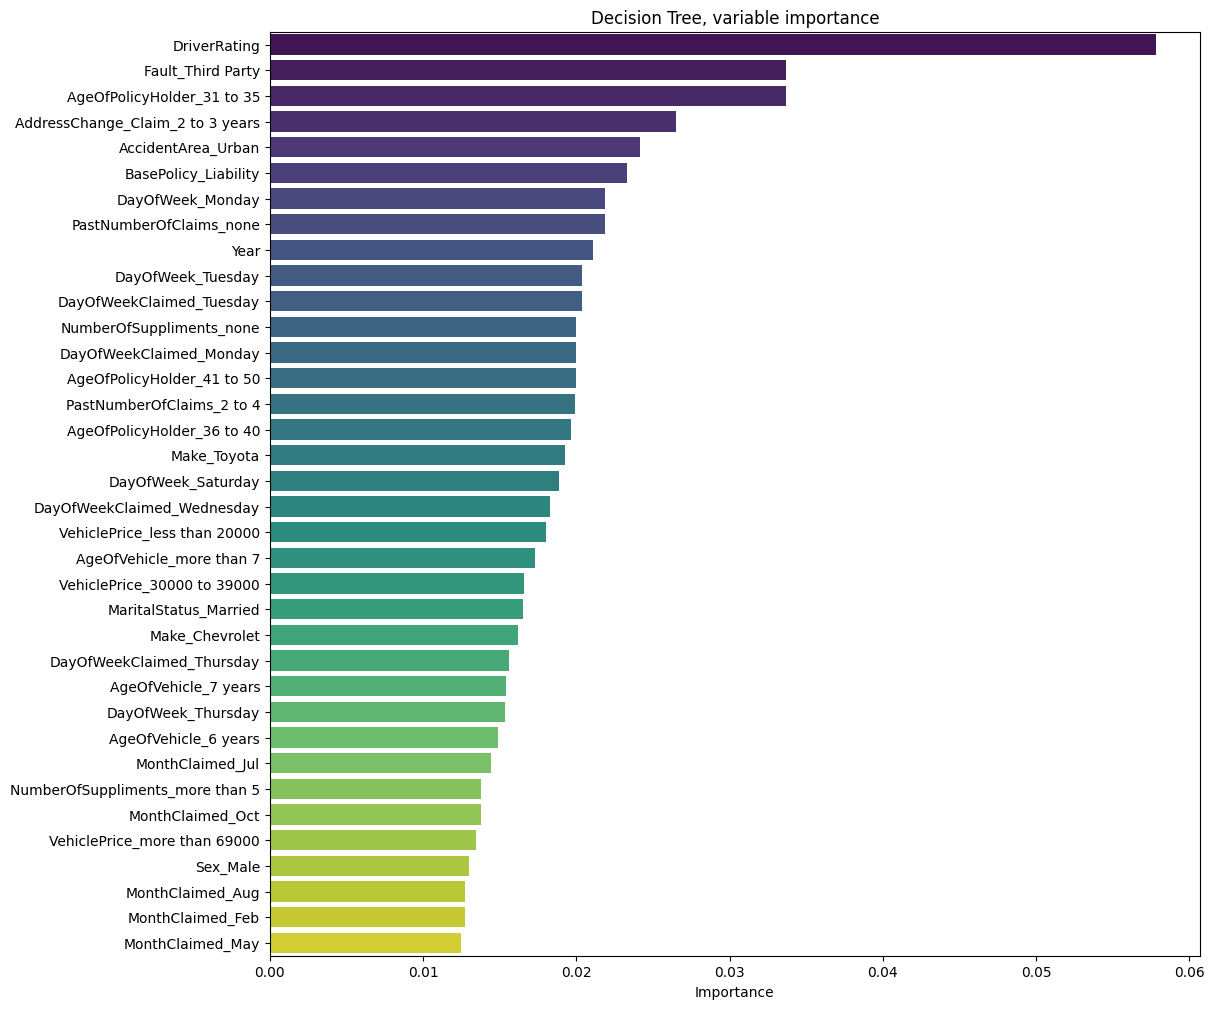

In [169]:
# Predictors of Fraudulant Insurance claims: 1) Drive rating, 2) Age of policy holder(31 to 35 year), 3)Third_party fault,
# 4) Address Change claim (2 to 3 years), 4) Day of week claimed_Tuesday
# to visualise in a bar plot
plt.figure(figsize=(12,12), dpi=100)
sns.barplot(data=dt_imp, y=dt_imp.index, x='Importance', palette='viridis')
plt.title('Decision Tree, variable importance', fontsize=12)
plt.ylabel('')
plt.show()